# Customizing Legends

We saw previously how to create a simple legend on a plot. 

Here we’ll take a look at customizing the *placement* and *aesthetics* of the legend in matplotlib.

In previous examples, you have already have seen the `plt.legend()` command (a couple times), which automatically creates a legend for any labeled plot elements. For example:

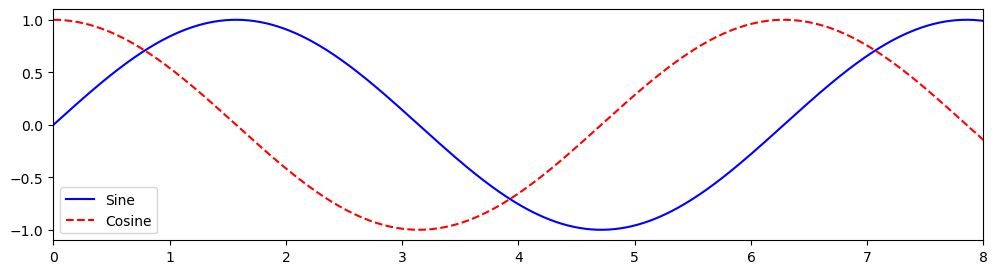

In [1]:
# these are done in my startup file
# import matplotlib.pyplot as plt
# import numpy as np

# Create an array of 1000 data points equally spaced between 0-10
x = np.linspace(0, 10, 1000)

# Set size of current figure
plt.figure(figsize=(12, 3))

# Plot the sine function as a blue solid line
plt.plot(x, np.sin(x), '-b', label='Sine')

# Plot the cosine function as a dashed red line to the same Axes
plt.plot(x, np.cos(x), '--r', label='Cosine')

# Set the x limits of the current Axes
plt.xlim(0, 8)

# Add legend (Note: label must be specified within the plt.plot() function call)
plt.legend()

# Show figure
plt.show()

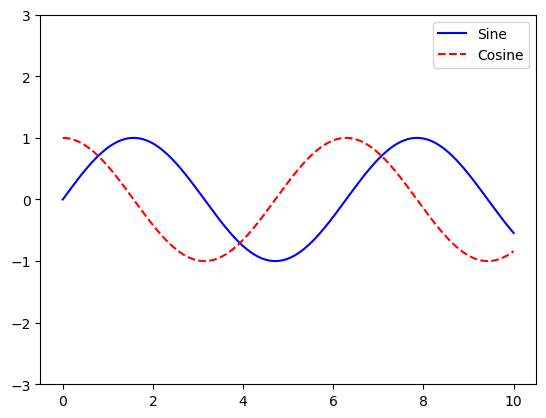

In [2]:
# Replot the sine and cosine functions
plt.plot(x, np.sin(x), '-b', label='Sine')
plt.plot(x, np.cos(x), '--r', label='Cosine')

# Set the y limits of the current Axes
plt.ylim(-3, 3)

# Add legend (Notice the change of location)
plt.legend()

# Show figure
plt.show()

There are many ways we might want to customize such a legend. 

For example, we can specify the location and turn off the frame:

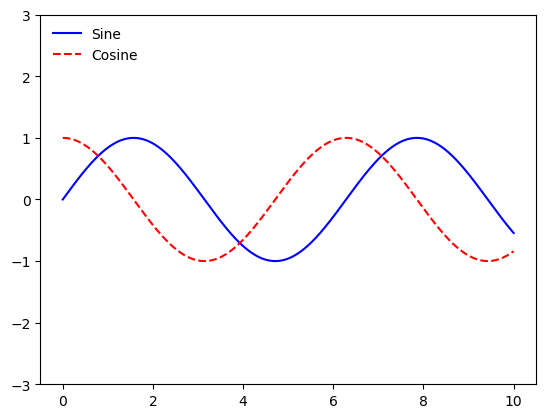

In [3]:
# Replot the sine and cosine functions
plt.plot(x, np.sin(x), '-b', label='Sine')
plt.plot(x, np.cos(x), '--r', label='Cosine')

# Set the y limits of the current Axes
plt.ylim(-3, 3)

# Add legend, specifying the location and frame
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.legend(loc='upper left', frameon=False)

# Show figure
plt.show()

We can use the `ncol` command to specify the *number of columns* in the legend:

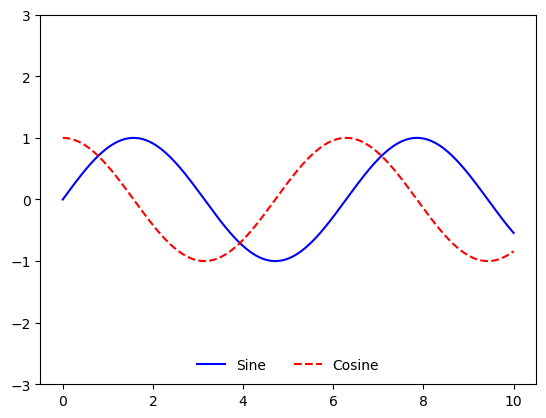

In [4]:
# Replot the sine and cosine functions
plt.plot(x, np.sin(x), '-b', label='Sine')
plt.plot(x, np.cos(x), '--r', label='Cosine')

# Set the y limits of the current Axes
plt.ylim(-3, 3)

# Add legend, specifying the location, frame, and number of columns
plt.legend(frameon=False, loc='lower center', ncol=2)

# Show figure
plt.show()

We can use a rounded box (`fancybox`) or add a `shadow`, change the transparency
(`alpha` value) of the frame, or change the `padding` around the text:

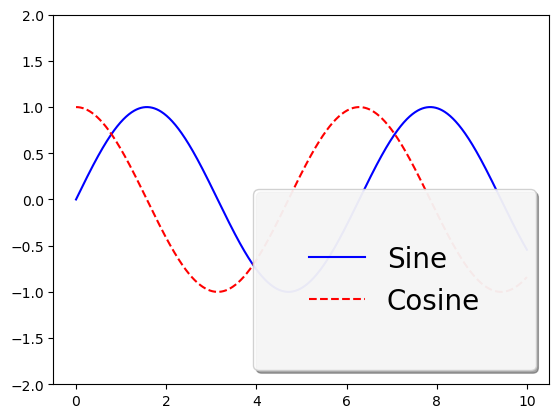

In [5]:
# Replot the sine and cosine functions
plt.plot(x, np.sin(x), '-b', label='Sine')
plt.plot(x, np.cos(x), '--r', label='Cosine')

# Set the y limits of the current Axes
plt.ylim(-2, 2)

# Add legend, enabling round edges and shadow 
# As well as specifying transparency of the legend's background, border padding, and font size
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=2, fontsize=20)

# Show figure
plt.show()

-------------------

## Choosing Elements for the Legend

Above we saw that, by default, the legend includes *all* labeled elements. 

If this is not what is desired, we can fine-tune which elements and labels appear in the legend by
using the objects returned by plot commands. The `plt.plot()` command is able to
create multiple lines at once, and returns a list of created line instances. 

Passing any of these to `plt.legend()` will tell it which to identify, along with the labels we’d like to
specify:

In [6]:
# Compute the sine of a 2D array where each row of 'x' (a 1D array) is broadcasted across multiple shifted versions of itself
y = np.sin( x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5) )
y

array([[ 0.00000000e+00,  1.00000000e+00,  1.22464680e-16,
        -1.00000000e+00],
       [ 1.00098428e-02,  9.99949900e-01, -1.00098428e-02,
        -9.99949900e-01],
       [ 2.00186827e-02,  9.99799606e-01, -2.00186827e-02,
        -9.99799606e-01],
       ...,
       [-5.27114986e-01, -8.49793970e-01,  5.27114986e-01,
         8.49793970e-01],
       [-5.35594881e-01, -8.44475058e-01,  5.35594881e-01,
         8.44475058e-01],
       [-5.44021111e-01, -8.39071529e-01,  5.44021111e-01,
         8.39071529e-01]])

In [7]:
# Check the shape of the array y
# You can think of the result as 4 sine waves, where each column corresponds to a sine wave with a different phase shift
y.shape

(1000, 4)

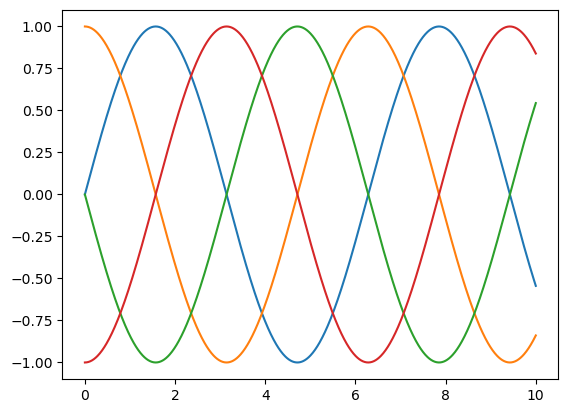

In [8]:
# Plot all 4 sine waves at once
lines = plt.plot(x, y)

# Plotting one sine wave at a time
# single_sine = y[:, 1]
# plt.plot(x, single_sine)
# print(single_sine.shape)

# Show figure
plt.show()

In [9]:
# Inspect the list of Line2D objects stored in lines
# Each Line2D object represents one of the plotted sine waves
lines

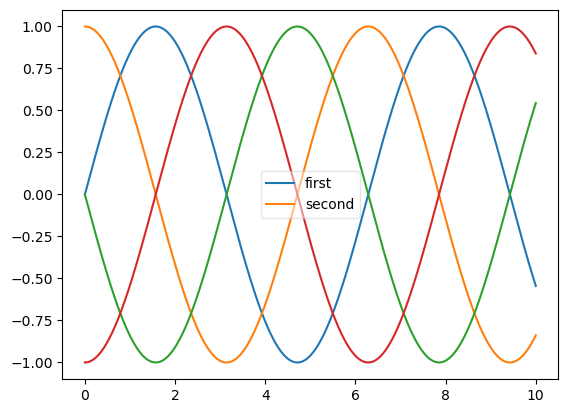

In [10]:
# Plot all 4 sine waves at once
lines = plt.plot(x, y)

# Add legend, but only include labels for the first two sine waves
plt.legend(lines[:2], ['first', 'second'], framealpha=0.5)

# Show figure
plt.show()

I generally find in practice that it is more clear to use the previous method however, but you can also use the following method to add each line one by one, along with specifying the labels for those you want to include in the legend.

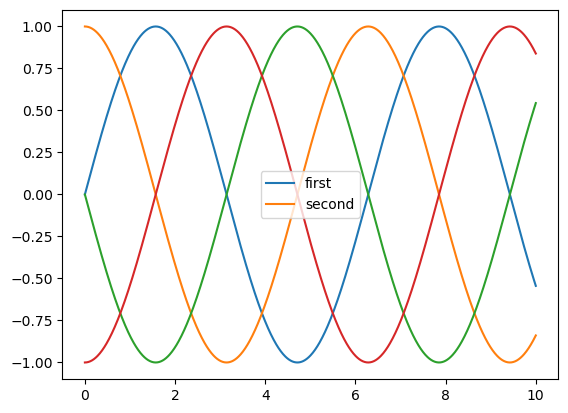

In [11]:
# Plot each line one by one, specifying the labels for those you want to include in the legend
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2])
plt.plot(x, y[:, 3])

# Add legend
plt.legend()

# Show plot
plt.show()

## Fake the Legend

Sometimes the legend defaults are not sufficient for the given visualization.  

For example, you may be using the size of points to mark certain features of the data, and want to create a legend reflecting this. 


Here is an example where we’ll use the size of points
to indicate populations of California cities. We’d like a legend which specifies the scale
of the sizes of the points, and we’ll accomplish this by plotting some labeled data with
no entries:

In [12]:
# Import the pandas library for data manipulation
import pandas as pd

# Load the California cities dataset from a CSV file into a DataFrame
cities = pd.read_csv('data/ca_cities.csv')

# Remove any rows containing missing values (NaN) to ensure clean data
cities.dropna(inplace=True)

In [13]:
# Display for first 5 rows (default)
cities.head()

,Country,lowername,City,Region,Population,Latitude,Longitude
16,us,adelanto,Adelanto,CA,21955.0,34.582778,-117.408333
26,us,agoura hills,Agoura Hills,CA,22222.0,34.136389,-118.773611
39,us,alameda,Alameda,CA,70443.0,37.765278,-122.240556
41,us,alamo,Alamo,CA,17764.0,37.850278,-122.031111
45,us,albany,Albany,CA,16144.0,37.886944,-122.296667


We want to show the population of these cities with location, color, and size of the marker. Something like this.

In [14]:
# Extract the data we're interested in
lat, lon, pop = cities['Latitude'], cities['Longitude'], cities['Population']

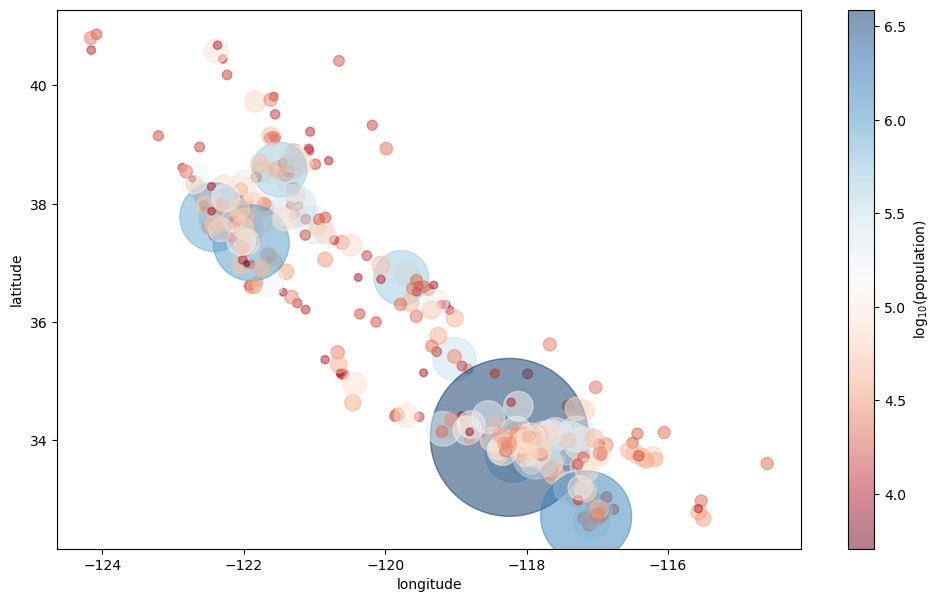

In [15]:
# Set the size of the current figure
plt.figure(figsize=(12, 7))

# Scatter the points (cities), using size & color
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(lon, lat, c=np.log10(pop), cmap='RdBu', s=pop/300, alpha=0.5)

# Add x and y labels
plt.xlabel('longitude')
plt.ylabel('latitude')

# Add a colorbar to indicate the population scale (log base 10)
plt.colorbar(label='log$_{10}$(population)')  # LaTeX in label

# Show figure
plt.show()

You can see the shape of *California* in the plot, wtih *Los Angeles*, *San Diego*, *San Francisco*, and *San Jose*, among other cities.

Now I can ***fake*** a "legend" for the size scale of the markers.

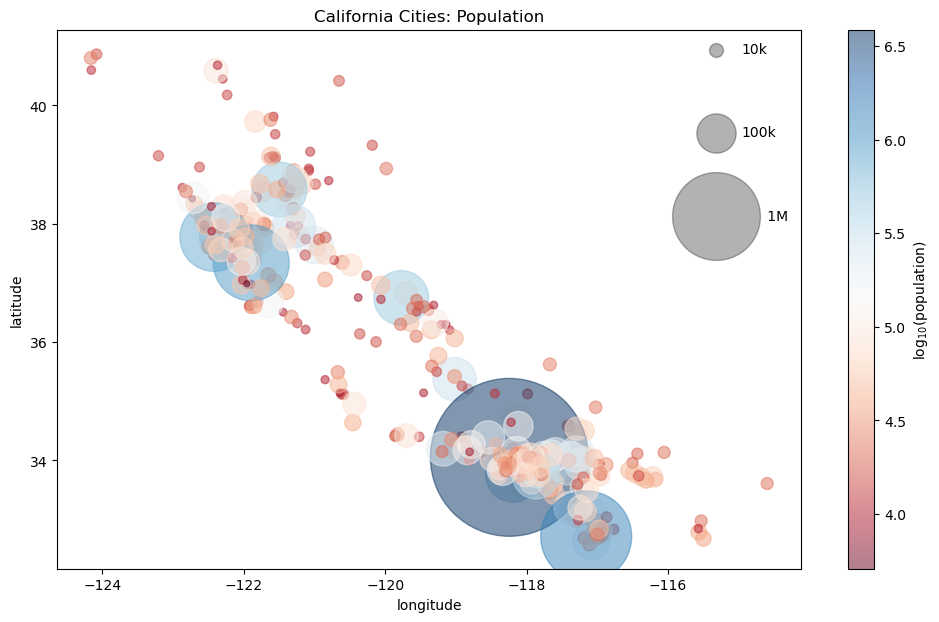

In [16]:
plt.figure(figsize=(12, 7))

# Scatter the points (cities), using size & color
plt.scatter(lon, lat, c=np.log10(pop), cmap='RdBu',s=pop/300, alpha=0.5)

# Uncomment the line below to enforce equal aspect ratio (square map projection).
# plt.axis(aspect='equal')

# Add x and y labels
plt.xlabel('longitude')
plt.ylabel('latitude')

# Add a colorbar to indicate the population scale (log base 10)
plt.colorbar(label='log$_{10}$(population)')  # LaTeX in label

# Add custom legend markers to indicate approximate population sizes
# Unlike `plt.scatter()`, no x and y values are provided—this creates invisible points that serve only as legend entries
for p, size in zip(["10k", "100k", "      1M"], [100, 800, 4000]):
    plt.scatter([], [], alpha=0.3, c='k', s=size, label=p)

# Add legend without a frame
plt.legend(frameon=False, labelspacing=5)

# Set the plot title
plt.title('California Cities: Population')

# Show the figure
plt.show()

The legend will always reference some object which is on the plot, so if we’d like to display a particular shape we need to plot it. 

In this case, the objects we want (gray circles) are not on the plot, so we fake them by plotting empty lists. Notice too that the legend only lists plot elements which have a label specified.

By plotting empty lists, we create labeled plot objects which are picked-up by the legend,
and now our legend tells us some useful information. This strategy can be useful
for creating more sophisticated visualizations.

Finally, note that **for geographic data like this, it would be much more clear if we could
show state boundaries or other map-specific elements**. 


---

## Introducing `folium`: add a quick interactive map to your plot

In [17]:
# !pip install folium

In [18]:
import folium

# Create a map centered at a specific location (e.g., mean latitude and longitude)
# See: https://python-visualization.github.io/folium/latest/user_guide/map.html
m = folium.Map(location=[cities.Latitude.mean(), cities.Longitude.mean()], zoom_start=6)

# Add points to the map
for _, city in cities.iterrows():
    folium.CircleMarker(
        location=[city.Latitude, city.Longitude],
        radius=city.Population / 300000,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5
    ).add_to(m)

# Display map
m



--------------------

## Multiple Legends

Sometimes when designing a plot you’d like to add multiple legends to the same axes.

Unfortunately, matplotlib does not make this easy: via the standard legend interface,
it is only possible to create a single legend for the entire plot. If you try to create a
second legend using `plt.legend()` or `ax.legend()`, it will simply override the first
one.

We can work around this by creating a new legend artist from scratch, and then
using the lower-level `ax.add_artist()` method to manually add the second artist to
    the plot:

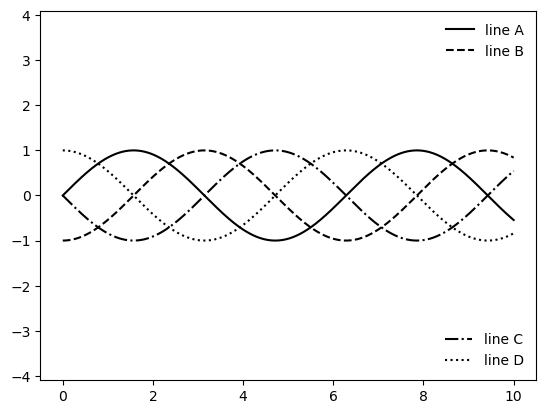

In [19]:
# Create a figure and an axis for plotting
fig, ax = plt.subplots()

lines = []  # Initialize an empty list to store line objects
styles = ['-', '--', '-.', ':']  # Define different line styles for each curve

# Generate 1000 points equally spaced between 0-10
x = np.linspace(0, 10, 1000)

# Loop to plot 4 sine waves with different phase shifts and styles
for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='black')

# Set the axis aspect ratio to be equal
ax.axis('equal')

# Create the first legend for the first two lines (lines A and B)
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right', frameon=False)

# Import the Legend class to manually add a second legend
from matplotlib.legend import Legend

# Create the second legend for the remaining two lines (lines C and D)
leg = Legend(ax, lines[2:], ['line C', 'line D'], loc='lower right', frameon=False)

# Add the second legend to the plot
ax.add_artist(leg)

# Show the final plot with both legends
plt.show()

---------

# Colorbars

Plot legends are *itemized* labels of sets of *discrete points* or *individual lines* on the graph. 

For *continuous* labels based on the color of points, lines, or regions, a *labeled colorbar* can be a great tool. 
In matplotlib, *a colorbar is a separate axes* which can provide a key for the meaning of colors in
a plot.

The simplest colorbar can be created with the `plt.colorbar()` function:

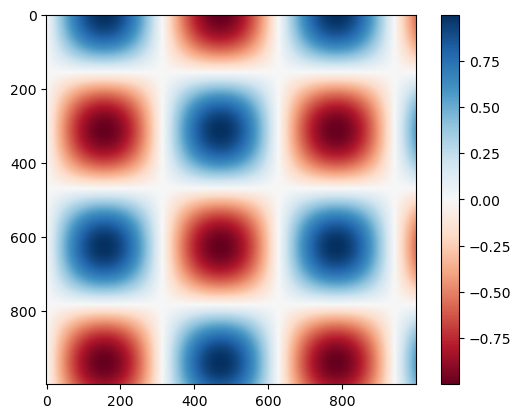

In [20]:
# Generate 1000 points equally spaced between 0-10
x = np.linspace(0, 10, 1000)

# Compute intensity values using broadcasting:
# - Broadcasting occurs when multiplying `np.sin(x)` (row vector) with `np.cos(x[:, np.newaxis])` (column vector), resulting in a 2D array.
intensity = np.sin(x) * np.cos(x[:, np.newaxis]) # <--- Broadcasting here!

# Display the 2D intensity array as an image using the 'RdBu' colormap
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
plt.imshow(intensity, cmap='RdBu')

# Add a colorbar to indicate intensity values
plt.colorbar()

# Show the final plot
plt.show()

## Customizing Colorbars

### Choosing the Colormap

One of the most important considerations when using colorbars is to choose an
appropriate colormap, set using the `cmap` argument of a variety of plotting functions.

Matplotlib’s online documentation also has an interesting discussion of colormap choices.

Broadly, you should be aware of three different categories of colormaps:

1. **Sequential** colormaps: these are made up of one continuous sequence of colors (e.g. `binary` or `cubehelix`).

2. **Divergent** colormaps: these usually contain two distinct colors, which show positive and negative deviations from a mean (e.g. `RdBu` or `PuOr`).

3. **Qualitative** colormaps: these mix colors with no particular sequence (e.g. `accent` or `jet`).

The `jet` colormap, which was the default in matplotlib prior to version 2.0, is an example of a qualitative colormap. 

Its status as the default was quite unfortunate, because qualitative maps are often not a useful choice for representing quantitative data. Among the problems is the fact that qualitative maps usually do not display any uniform progression in brightness as the scale increases.

We can see this by converting the jet colorbar into black and white:

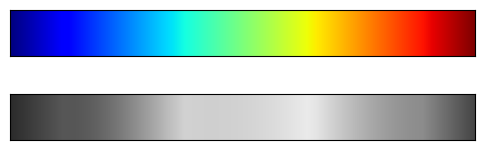

In [21]:
import matplotlib.colors as mcolors

def grayscale_cmap(cmap_name):
    """Return a grayscale version of the given colormap"""
    cmap = plt.colormaps[cmap_name]  # Retrieve the colormap using its name
    colors = cmap(np.arange(cmap.N))
    
    # Convert RGBA to perceived grayscale luminance
    # Reference: http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    
    # Assign the computed luminance to the RGB channels
    colors[:, :3] = luminance[:, np.newaxis]
    
    return mcolors.ListedColormap(colors, name=cmap_name + "_gray")

def view_colormap(cmap_name):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.colormaps[cmap_name]  # Retrieve the original colormap
    colors = cmap(np.arange(cmap.N))
    
    grayscale = grayscale_cmap(cmap_name)(np.arange(cmap.N))  # Convert to grayscale

    fig, ax = plt.subplots(2, figsize=(6, 2), subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

view_colormap('jet')

Notice the bright stripes in the grayscale image. Even in full-color, this uneven brightness
means that the eye will be drawn to certain portions of the color range, which
will potentially emphasize unimportant parts of the dataset. 

Better is to use a color‐map such as `cubehelix`, which is specifically constructed to have an even brightness
variation across the range. Thus it not only plays well with our color perception, but
also will translate well to greyscale printing:

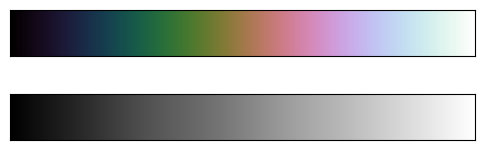

In [22]:
view_colormap('cubehelix')

For other situations such as showing positive and negative deviations from some
mean, dual-color colorbars such as `RdBu` (Red-Blue) amd `PuOr` (Purple-Orange) can be useful. 

Note, however, that the positive-negative information will be lost upon translation to greyscale!

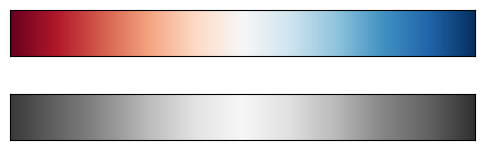

In [23]:
view_colormap('RdBu')

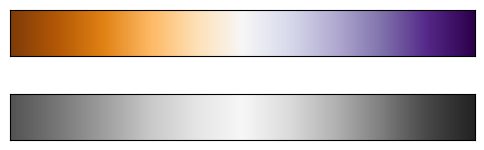

In [24]:
view_colormap('PuOr')

There are a large number of colormaps available in matplotlib; to see a list of them
you can use Jupyter to explore the plt.cm submodule.

To see the available colormaps (often you just have to try them until you find the one you like),  
type `plt.cm.` then hit [TAB]. (Don't forget the trailing **.** )

In [ ]:
plt.cm.

--------------

## Discrete Color Bars

Colormaps are by default continuous, but sometimes you’d like to represent discrete
values. 

The easiest way to do this is to use the `plt.cm.get_cmap('cmap', n)` function, and pass
the name of the colormap `cmap`, along with the number of desired bins `n`:


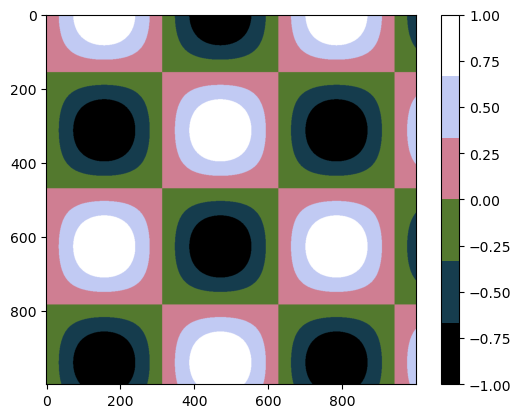

In [25]:
import warnings
from matplotlib import MatplotlibDeprecationWarning

# Suppress MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

# Continuous default
# plt.imshow(intensity, cmap='cubehelix')

plt.imshow(intensity, cmap=plt.cm.get_cmap('cubehelix', 6))

plt.colorbar()
plt.clim(-1, 1)

plt.show()

----------

## Example: Hand-written Digits

For an example of where this might be useful, let’s look at an interesting visualization
of some hand-written digits data. 

This data is included in `scikit-learn`, and consists of nearly 2000 8x8 thumbnails showing various hand-written digits.

For now, let’s start by downloading the digits data and visualizing several of the example
images with `plt.imshow()`:

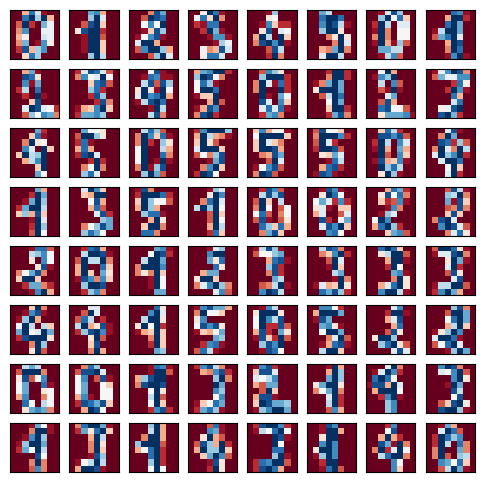

In [26]:
# Load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits

# Load the digits dataset, restricting to classes 0 through 5 (n_class=6)
digits = load_digits(n_class=6)

# Create a figure with an 8x8 grid of subplots (for 64 images) with no axis ticks
fig, ax = plt.subplots(8, 8, figsize=(6, 6), subplot_kw=dict(xticks=[], yticks=[]))

# Loop over each subplot and display one image from the digits dataset
for i, axi in enumerate(ax.flat):
    # Display the ith image in the subplot with 'RdBu' colormap
    axi.imshow(digits.images[i], cmap='RdBu')

# Show the plot
plt.show()

Because each digit is defined by the hue of its 64 pixels, we can consider each digit to
be a point lying in 64-dimensional space: each dimension represents the brightness of
one of the 64 pixels. 

In [27]:
# Access the first image in the digits dataset
# digits.images[0] is a 2D array (8x8) where each value represents the pixel intensity of one pixel in the image
# The values range from 0 (black) to 16 (white), indicating the level of intensity for each pixel in the 8x8 image
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

But visualizing relationships in such high-dimensional spaces can be
extremely difficult. One way to approach this is to use a *dimensionality reduction*
technique such as *manifold learning* to reduce the dimensionality of the data while
maintaining the relationships of interest. 

Dimensionality reduction is an example of unsupervised machine learning, and you will learn about that more in **Machine Learning**.

Deferring the discussion of those details, let’s take a look at a two-dimensional manifold learning projection of these digits data. 

This time we'll load a `'Greys'` colormap.

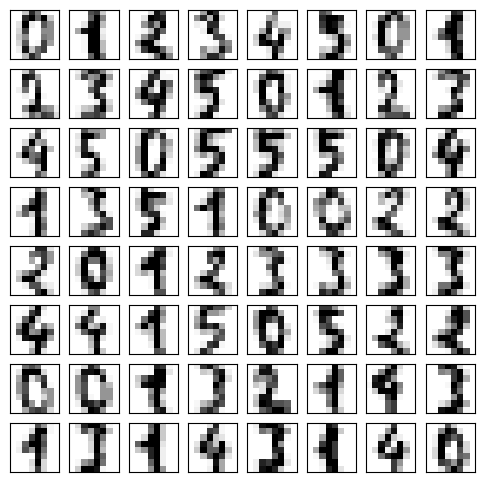

In [28]:
# Create a figure with an 8x8 grid of subplots (for 64 images) with no axis ticks
fig, ax = plt.subplots(8, 8, figsize=(6, 6), subplot_kw=dict(xticks=[], yticks=[]))

# Loop over each subplot and display one image from the digits dataset
for i, axi in enumerate(ax.flat):
    # Display the ith image in the subplot with 'Greys' colormap
    axi.imshow(digits.images[i], cmap='Greys')

# Show the figure
plt.show()

In [29]:
from sklearn.manifold import Isomap
from scipy.sparse import SparseEfficiencyWarning

warnings.filterwarnings("ignore", category=UserWarning, message=".*number of connected components.*")
warnings.filterwarnings("ignore", category=SparseEfficiencyWarning)

# Project the digits into 2 dimensions using IsoMap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)


We’ll use our discrete colormap to view the results, setting the `ticks` and `clim` to
improve the aesthetics of the resulting colorbar:

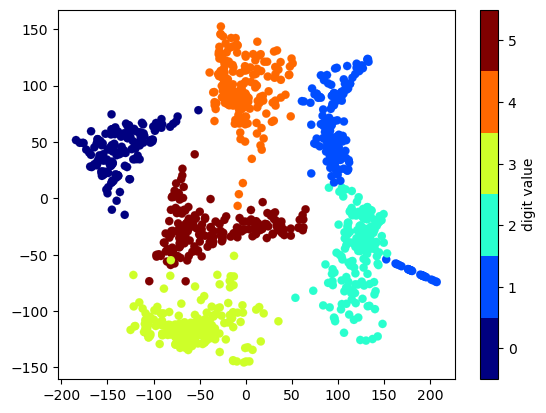

In [30]:
# Create a scatter plot of the 2D projected digits, using the first and second dimensions
# projection[:, 0] -> first component (x-axis)
# projection[:, 1] -> second component (y-axis)
# lw=0.1 -> line width for scatter points (making points smaller)
# c=digits.target -> colors based on the digit target value (0 to 5)
# cmap=plt.cm.get_cmap('jet', 6) -> colormap with 6 colors, corresponding to digit classes 0-5
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1, c=digits.target, cmap=plt.cm.get_cmap('jet', 6))

# Add a color bar to the plot, with ticks for the range of digits (0 to 5)
plt.colorbar(ticks=range(6), label='digit value')

# Set the color limits for the color bar to match the digit range
plt.clim(-0.5, 5.5)

# Show the figure
plt.show()

This plot gives us some interesting insights: the nonlinear mapping shows that samples
of handwritten digits from 0 to 5 can be quite well separated based on their pixel
values. 

The projection also gives us some insight: for example, the ranges of 5 and 3
nearly overlap in this projection, indicating that some hand-written fives and threes
are difficult to distinguish, and therefore more likely to be confused by an automated
classification algorithm. 

Other values, like 0 and 1, are more distantly separated, and
therefore much less likely to be confused. This observation agrees with our intuition,
because 5 and 3 look much more similar than do 0 and 1.


-------------

# Multiple Subplots

It is often desirable to show multiple subplots within a single figure. These subplots
might be insets, grids of plots, or other more complicated layouts. Here we’ll explore
four routines for creating subplots in matplotlib. 

## `plt.axes()`: subplots by-hand

The basic method of creating an axes is to use the `plt.axes()` function. As we’ve seen previously, by default this creates a standard axes object which fills the entire figure. `plt.axes()` also takes an optional argument which is a list of four numbers in the figure coordinate system. These numbers represent `[bottom, left, width, height]` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by
setting the x and y position to 0.65 (that is, starting at 65% of the width and 65% of
the height of the figure) and the x and y extents to 0.2 (that is, the size of the axes is
20% of the width and 20% of the height of the figure):

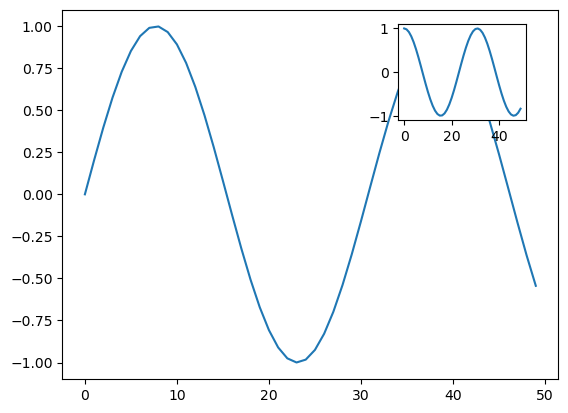

In [31]:
# Plot two empty Axes objects
ax1 = plt.axes() # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])  # The inset. In the [] are the "Figure coordinates" of the axes.

# Generate an array of 50 equally spaced values between 0-10
x = np.linspace(0, 10, 50)

# Plot the sine function in the first Axes
ax1.plot(np.sin(x))

# Plot the cosine function in the second Axes
ax2.plot(np.cos(x))

# Show the figure
plt.show()

Above we used the *pyplot* interface `plt`. The equivalent of this command within the *OO (object-oriented)* interface is
`fig.add_axes()`. Let’s use this to create two side-by-side axes:

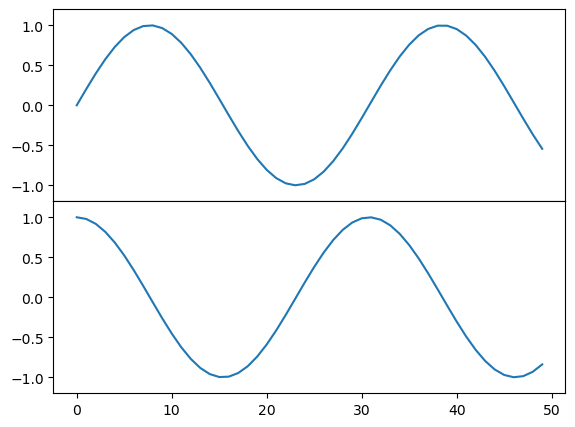

In [32]:
# Create an empty figure
fig = plt.figure()

# Add the first empty Axes at the specified coordiantes, no x-tick labels and limiting the y-axis
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))

# Add the second empty Axes at the specified coordinates, limiting the y-axis
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))

# Generate an array of 50 equally spaced values between 0-10
x = np.linspace(0, 10, 50)

# Plot the sine function to the first Axes
ax1.plot(np.sin(x))

# Plot the cosine function to the second Axes
ax2.plot(np.cos(x))

# Show the figure
plt.show()

We see that we now have two axes (the top with no tick labels) which are just touching:
The bottom of the upper panel (at position 0.5) matches the top of the lower
panel (at position 0.1 + 0.4).

-------------

## `plt.subplot()`: simple grids of subplots

Aligned columns or rows of subplots are a common-enough need that matplotlib has
several convenience routines which make them easy to create. 

The lowest-level of these is `plt.subplot()`, which creates a single subplot within a grid.  

The `plt.subplot()` command takes three integer arguments: the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right. For example:

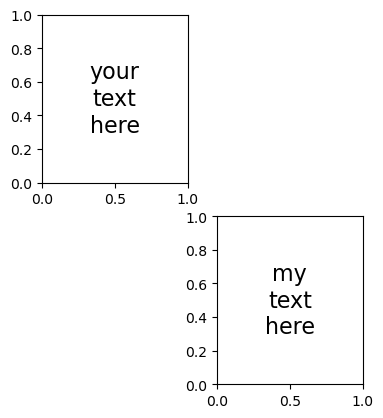

In [33]:
# Create a subplot in the 2nd row, 3rd column (grid index 1)
# 2 rows, 3 columns, and we are selecting the first subplot
plt.subplot(2, 3, 1)

# Add text to the center of the first subplot
# (0.5, 0.5) -> coordinates for the text (center of the subplot)
# "your\ntext\nhere" -> the text, '\n' is used for line breaks
# fontsize=16 -> sets the font size
# ha='center' -> horizontal alignment set to center
# va='center' -> vertical alignment set to center
plt.text(0.5, 0.5, "your\ntext\nhere", fontsize=16, ha='center', va='center')

# Create a subplot in the 2nd row, 3rd column (grid index 5)
# 2 rows, 3 columns, and we are selecting the fifth subplot
plt.subplot(2, 3, 5)

# Add text to the center of the fifth subplot
plt.text(0.5, 0.5, "my\ntext\nhere", fontsize=16, ha='center', va='center')

# Show the figure
plt.show()

A much better example is this usage:

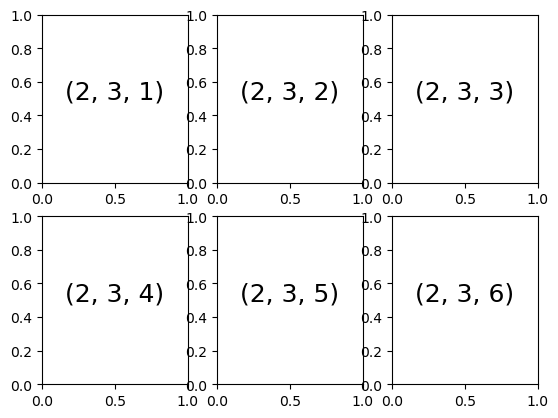

In [34]:
# Loop through values from 1 to 6 (inclusive)
for i in range(1, 7):
    # Create a subplot with 2 rows, 3 columns, and select the i-th subplot (i is 1 to 6)
    plt.subplot(2, 3, i)

    # Add text to the center of the subplot (0.5, 0.5) is the center of the subplot
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

# Show the figure
plt.show()

The spacing between these plots can be adjusted by using the command `plt.subplots_adjust()`.  

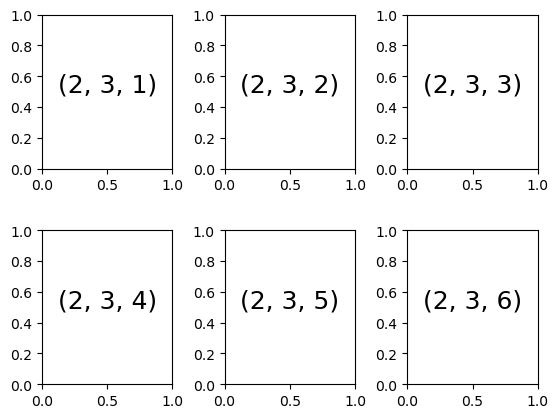

In [35]:
# Loop through values from 1 to 6 (inclusive)
for i in range(1, 7):
    # Create a subplot with 2 rows, 3 columns, and select the i-th subplot (i is 1 to 6)
    plt.subplot(2, 3, i)

    # Add text to the center of the subplot (0.5, 0.5) is the center of the subplot
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

# Adjust the spacing between subplots in the figure
# hspace controls the vertical space between rows of subplots
# wspace controls the horizontal space between columns of subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)    

# Show the figure
plt.show()

Here we’ll use the equivalent *object-oriented* command, `fig.add_subplot()`:

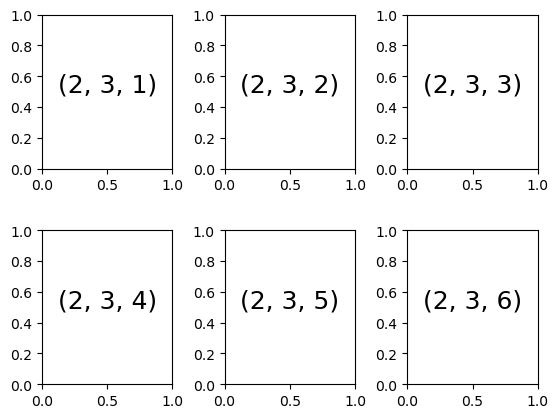

In [36]:
# Create an empty figure
fig = plt.figure()

# Adjust the spacing between subplots in the figure
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Loop through values from 1 to 6 (inclusive)
for i in range(1, 7):
    # Create a subplot with 2 rows, 3 columns, and select the i-th subplot (i is 1 to 6)
    ax = fig.add_subplot(2, 3, i)

    # Add text to the center of the subplot (0.5, 0.5) is the center of the subplot
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

# Show the figure
plt.show()

We’ve used the `hspace` and `wspace` arguments of `plt.subplots_adjust()`, which specify
the spacing along the height and width of the figure, in units of the subplot size (in
this case, the space is 40% of the subplot width and height).

## `plt.subplots()`: the whole grid in one go

Even the above can become quite tedious when creating a large grid of subplots, especially
if you’d like to hide the x and y axis labels on the inner plots. 

For this purpose `plt.subplots()` is the easier tool to use (note the **s** at the end of subplots). 

Rather than creating a single subplot, this function creates a full grid of subplots in a single
line, returning them in a numpy array. The arguments are the number of rows and
number of columns, along with optional keywords `sharex` and `sharey`, which allow
you to specify the relationships between different axes.

Here we’ll create a 2 x 3 grid of subplots, where all axes in the same row share their yaxis
scale, and all axes in the same column share their x-axis scale.

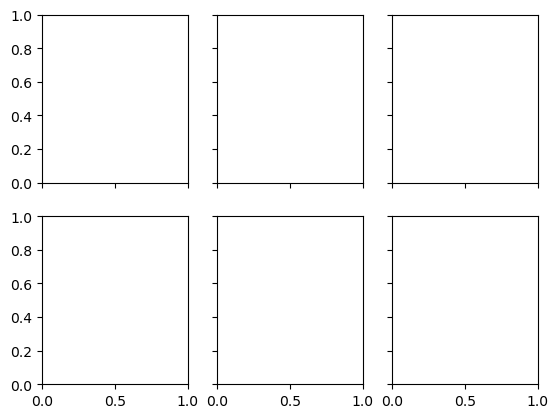

In [37]:
# Create a 2x3 grid of subplots with shared x-axis for each column and shared y-axis for each row
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

# Show the figure
plt.show()

Note that by specifying `sharex` and `sharey`, we’ve automatically removed inner labels
on the grid to make the plot cleaner. The resulting grid of axes instances is returned
within a numpy array, allowing for convenient specification of the desired axes using
standard array indexing notation:

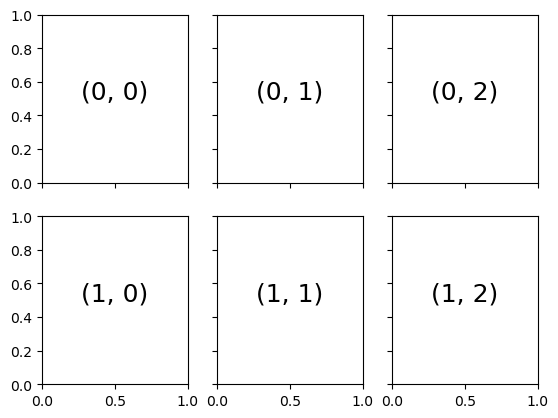

In [38]:
# print(ax)

# Axes are in a 2D array, indexed by [row, col], so we need to have a nested loop to iterate through all them
for i in range(2):  # 2 represents number of rows
    for j in range(3):  # 3 represents number of columns
        # Add text to the center of the subplot (0.5, 0.5) is the center of the subplot
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')

fig

In comparison to `plt.subplot()`, `plt.subplots()` is more consistent with Python’s
conventional 0-based indexing.

------------


# Text and Annotation

Creating a good visualization is about guiding the reader so that the figure tells a
story. Sometimes, this story can be told visually, without the need for added text.

Other times, small textual cues and labels are a necessity.

Perhaps the most basic types of annotations you will use are axes labels and titles, but
the options go beyond this. Let’s take a look at some data and how we might visualize
and annotate it to help convey interesting information.

In [39]:
data = pd.read_csv('data/storage.tsv', sep='\t')
data.head()

,Date,Company,Size(MB),Cost(USD),USD/GB
0,1980 January 1,Morrow Designs,26.0,5000.0,193000.0
1,1980 July 1,North Star,18.0,4199.0,233000.0
2,1981 September 1,Apple,5.0,3500.0,700000.0
3,1981 November 1,Seagate,5.0,1700.0,340000.0
4,1981 December 1,VR Data Corp.,6.3,2895.0,460000.0


Let's convert the dates:

In [40]:
# A dictionary for months -> n
modict = {
    "January": 0, 
    "February": 1, 
    "March": 2, 
    "April": 3, 
    "May": 4, 
    "June": 5, 
    "July": 6, 
    "August": 7, 
    "September":8,
    "October": 9, 
    "November": 10, 
    "December": 11
}

# a function to convert the date string into a year + fraction
def deciyr(s):
    yr, mo, day, = s.split()
    return float(yr) + float(modict[mo])/12 + float(day)/31

In [41]:
# For example
deciyr("1980 December 1")

1980.9489247311828

In [42]:
# Create a new column in a dataset, 'DeciYear', where represents the year in year + fraction
data['DeciYear'] = data['Date'].apply(deciyr)

In [43]:
# Inspect the last 5 rows (default)
data.tail()

,Date,Company,Size(MB),Cost(USD),USD/GB,DeciYear
269,2007 June 24,Seagate 250GB,250000.0,100.00,0.40,2008.190860
270,2007 June 24,Seagate 160GB,160000.0,70.00,0.44,2008.190860
271,2008 January 13,Seagate Barracuda 7200.10 750GB,750000.0,200.00,0.27,2008.419355
272,2008 January 13,Beyond Micro Monster Mobile 1TB,1000000.0,270.00,0.27,2008.419355
273,2009 July 24,HITACHI 0A38016 7200 RPM SATA 3.0Gb/s,1000000.0,74.99,0.07,2010.274194


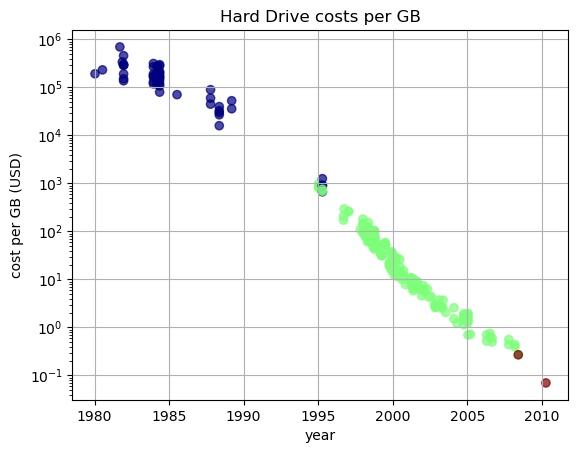

In [44]:
# Set the y-axis to a logarithmic scale for better visualization of data with wide range of values
plt.yscale('log')

# Transform the 'Size(MB)' column by applying log10, divide by 3, and use it to determine the color of the points
color = np.log10(data['Size(MB)']) // 3

# Create a scatter plot with 'DeciYear' on the x-axis, 'USD/GB' on the y-axis, and color the points based on the 'color' variable
# Use the 'jet' colormap and set transparency (alpha) to 0.7 for the points
plt.scatter(data['DeciYear'], data['USD/GB'], c=color, cmap='jet', alpha=0.7)

# Enable gridlines
plt.grid()

# Set the x and y labels
plt.xlabel('year')
plt.ylabel('cost per GB (USD)')

# Set the title of the plot
plt.title('Hard Drive costs per GB')

# Show the figure
plt.show()

Notice several things:

* We plotted this data on a *Semi-Log* scale. "Semi-" because only *one* axis is log scaled. 

* We added a grid. Even though we are using the *Pandas* interface to Matplotlib, we can also use the *pyplot* interface to interact with the plot, which we do with `plt.grid()`. 

Now, add some text annotation:

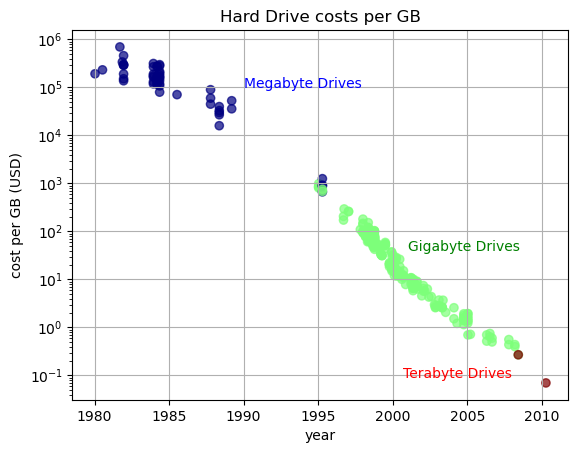

In [45]:
# Set the y-axis to a logarithmic scale for better visualization of data with wide range of values
plt.yscale('log')

# Transform the 'Size(MB)' column by applying log10, divide by 3, and use it to determine the color of the points
color = np.log10(data['Size(MB)']) // 3

# Create a scatter plot with 'DeciYear' on the x-axis, 'USD/GB' on the y-axis, and color the points based on the 'color' variable
# Use the 'jet' colormap and set transparency (alpha) to 0.7 for the points
plt.scatter(data['DeciYear'], data['USD/GB'], c=color, cmap='jet', alpha=0.7)

# Enable gridlines
plt.grid()

# Set the x and y labels
plt.xlabel('year')
plt.ylabel('cost per GB (USD)')

# Set the title of the plot
plt.title('Hard Drive costs per GB')

# Annotate the plot at the specified coordinate using the specified color
plt.text(1990, 1e5, 'Megabyte Drives', color='blue')
plt.text(2001, 40, 'Gigabyte Drives', color='green')
# The 'ha="right"' argument aligns the text to the right of the specified coordinates
plt.text(2008, 0.09, 'Terabyte Drives', color='red', ha='right')

# Show the figure
plt.show()

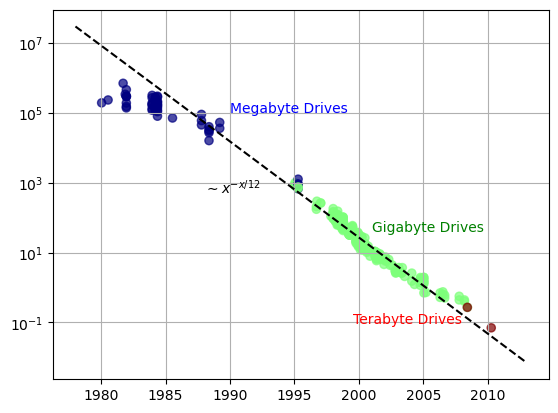

In [46]:
# Generate an array of 50 linearly spaced values between 1978 and 2013 (inclusive)
x = np.linspace(1978, 2013, 50)

# Calculate the y-values using the given formula. The values of y are inversely proportional to the difference from the year 1980.
y = x**(-(x-1980)/12 + 2.1)

# Set the y-axis to a logarithmic scale for better visualization of data with wide range of values
plt.yscale('log')

# Transform the 'Size(MB)' column by applying log10, divide by 3, and use it to determine the color of the points
color = np.log10(data['Size(MB)']) // 3

# Create a scatter plot with 'DeciYear' on the x-axis, 'USD/GB' on the y-axis, and color the points based on the 'color' variable
# Use the 'jet' colormap and set transparency (alpha) to 0.7 for the points
plt.scatter(data['DeciYear'], data['USD/GB'], c=color, cmap='jet', s=35, alpha=0.7)

# Plot a dashed line using the x and y arrays generated earlier to visualize the relationship
plt.plot(x, y, "k--")  # "k--" means black dashed line

# Enable gridlines
plt.grid()

# Annotate the plot at the specified coordinate using the specified color
plt.text(1990, 1E5, 'Megabyte Drives', color='blue')
plt.text(2001, 40, 'Gigabyte Drives', color='green')
plt.text(2008, 0.09, 'Terabyte Drives', color='red', ha='right')
plt.text(1988, 5e2, r"$\sim{x}^{-{x}/12}$")  # Uses black as default font color. Notice LaTex formatting.

# Show the figure
plt.show()

---------------


## Annotate

Another powerful formatting tool is the `annotate` method. Below are a couple examples of its use.

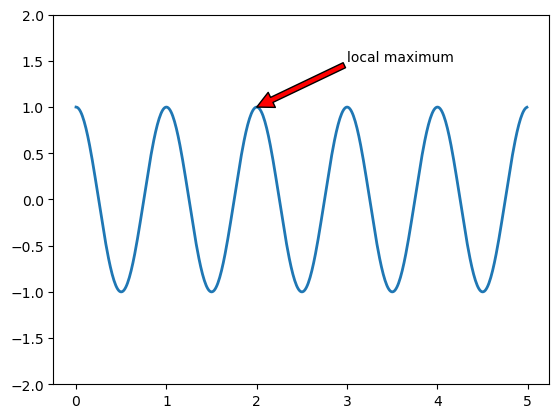

In [47]:
# Create an array 't' containing values from 0.0 to 5.0 with a step size of 0.01
t = np.arange(0.0, 5.0, 0.01)

# Create an array 's' that stores the cosine of 2*pi*t (a periodic wave with a frequency of 1 cycle)
s = np.cos(2*np.pi*t)

# Plot the values in 't' (x-axis) against 's' (y-axis) with a line width of 2
plt.plot(t, s, lw=2)

# Annotate a point on the plot at (2, 1) with the label 'local maximum', 
# and place the annotation text at (3, 1.5) with an arrow pointing from the annotation text to the point
plt.annotate('local maximum', xy=(2, 1), xytext=(3, 1.5), arrowprops=dict(facecolor='red'))

# Set the y-axis limits
plt.ylim(-2, 2)

# Show the figure
plt.show()

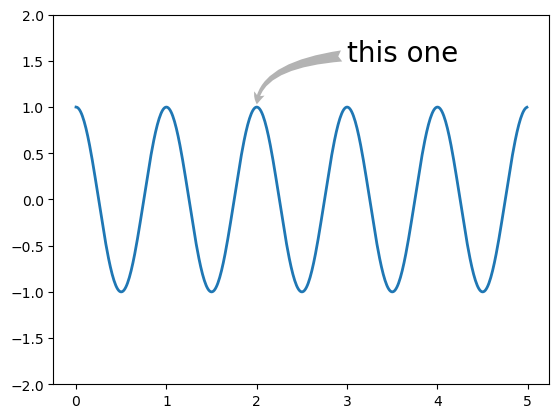

In [48]:
# Create an array 't' containing values from 0.0 to 5.0 with a step size of 0.01
t = np.arange(0.0, 5.0, 0.01)

# Create an array 's' that stores the cosine of 2*pi*t (a periodic wave with a frequency of 1 cycle)
s = np.cos(2*np.pi*t)

# Plot the values in 't' (x-axis) against 's' (y-axis) with a line width of 2
plt.plot(t, s, lw=2)

# Annotate a point on the plot at (2, 1) with the label 'this one',
# and place the annotation text at (3, 1.5), with the font size set to 20.
# The arrow has a 'fancy' style, with a face color of light gray (fc="0.7"),
# no edge color (ec="none"), and a connection style defined by an angle-based path.
plt.annotate('this one', xy=(2, 1), xytext=(3, 1.5), size=20, 
             arrowprops=dict(arrowstyle="fancy", fc="0.7", ec="none", connectionstyle="angle3,angleA=0,angleB=-90"))

# Set the y-axis limits
plt.ylim(-2,2)

# Show the figure
plt.show()

For more examples of the use of `connectionstyle` with arrows, see the demo/gallery at:

https://matplotlib.org/3.1.0/gallery/userdemo/connectionstyle_demo.html


<img src='https://matplotlib.org/3.1.0/_images/sphx_glr_connectionstyle_demo_001.png'>